# Computational Theory
### By Joshua Uzell

## Introduction
***

This notebook will cover the numbers game that is included in the T.V show Countdown.

First, we'll give an explaination of the numbers game in Countdown, explaining the different rules and complexities of how it works. Then we'll try solving the numbers game using a python function called solve_numbers. 

We'll explain our thought process for how to work out the problem. Then we'll go through various solutions, starting with a rough solution first, then gradually working towards a more efficient solution. 
		
As well as this we may take a look at using Reverse Polish notation for one of our solutions. 

Note that the coding sections of this notebook were completed with the aid of OpenAI's ChatGPT, however all explainations (with proper references if required) and code comments were created by myself. 

## Summary of Countdown
***

In the T.V show Countdown, there is a numbers round where players perform arithmetic operations on six big or small random numbers in order to get as close as possible to a randomly generated target number that is between (but also including) 101 and 999. 

First at the start of the round, players are given 6 random numbers. Each number can be either big or small. 

Big numbers include 25, 50, 75, 100. No duplicates are permitted.
Small numbers include 1 to 10 with each number getting a duplicate.

In the T.V show, the player chooses how many big or small numbers they want up to 6 numbers.

For our version, we will simply this process by just having our list of six numbers contain all 4 large numbers and 2 small numbers.

Upon receiving the 6 numbers, each number can only be used once for a given operation but you don't have to use every number in the list if it's not needed.

After this, a target number is generated between 101 and 999 (both of which are included in the generation). This will be the number that the player has to reach by peforming arithmetic calculations on some or all of the 6 numbers that they were given. Any result received from peforming an operation between numbers in the list can be used for another calculation.

It's important to be aware that negative numbers and fractions are not allowed during these operations.

Now that we have an idea of how the numbers game works, let's move on to explaining the various strategies for a possible solution to the problem.

## Different Strategies for Implementing a Solution

Before we dive into the different strategies, we need to first discuss the concept of functional programming, and how it help us in implementing a solution to this problem.

### Functional Programming

According to Cassidy Williams on Github (https://github.com/readme/guides/functional-programming-basics) [\[1\]](#fp101) this type of programming paradigm revolves around the use of functions. Instead of combining data and behaviour to form an object like in Object Oriented Programming, Functional Programming seperates these 2 elements, making it in theory much simpler to write and debug. [\[1\]](#fp101)

There are rules to keep in mind when programming with this paradigm. First you must make sure that the data cannot be changed. For example, if you wish to change a value of an existing variable, then you create a new variable with a different name and value. The second is that functions don't have any state. So the function will contain the same return value for the same arguments everytime. [\[1\]](#fp101)

As stated by Williams [\[1\]](#fp101), the best practices are that functions should have at least one arguement, the function should return some sort of data and loops should not be used.

Below are some snippets of Javascript code from William's article [\[1\]](#fp101) that showcase how you would use Functional Programming. 

```markdown
let students = [
  ['Jacklyn Ford', 3.95],
  ['Cassidy Williams', 4.0],
  ['Joe Randy', 2.2],
];
```

```markdown
function changeGPAs(students) {
  return students.map(student => changeGPA(student, .1))
}
```

```markdown
function changeGPA(student, amount) {
    return [student[0], student[1] + amount]
}
```

The code examples above show a program for a school that stores a group of students, each with a name and a GPA score. Unlike in Object Oriented Programming where the students are stored as objects, here we store the students in an array. This is because as stated by Williams [\[1\]](#fp101), it is better practice to use hashes and arrays instead of other data structures like objects so as to simplify the process of dealing with data and how it behaves in a system [\[1\]](#fp101). With this program, the user is able to update one or all of the student's GPA scores using the two above functions. Instead of using a loop to update each students grade, the changeGPA method is called in the the changeGPA's method on each student and the result is a newly formed array that doesn't change the old array's data. [\[1\]](#fp101)

Now that we have a basic understanding of how functional programming works, we'll now discuss the different types of syntax that are used to represent mathematical formulas. The most common of these is called Infix Notation.

### Infix Notation

According to an article by Yassine Kodad from the Medium (https://medium.com/@serene_mulberry_tiger_125/understanding-expressions-infix-prefix-and-postfix-notations-in-computer-science-and-mathematics-c5390cee01be) [\[2\]](#medExpr), infix notation is a common way of representing a maths expression where you have a list of operands (numbers) and between each operand is an operator (represented as mathematical symbol like '+', '-', 'x', '÷') [\[2\]](#medExpr). These operators determine which calculations take precedence first over others. 

As stated by Kodad [\[2\]](#medExpr), Multiplication comes first in terms of level of precedence. Then afterwards comes division, followed by addition and then finally subtraction. 
An example of infix notation would be '5 + 2 * 3'. Based on how infix notation works, if we were to do this calculation, the '2*3' would be done first based on level of precedence which would give use '6'. Then we would add the '6' to the '5' to get '11'. 

A problem with this precedence system for infix, as noted by Kodad [\[2\]](#medExpr), is in it's ambiguity. The longer the expression, the harder it will be to determine the correct approach for solving it. That's why parenthesis are used to explicitly determine what operation gets done first. So if we instead did '(5+2) * 3' we would then get '21'  because we emphasized the importance of doing '5+2' first by putting parenthesis around them, which gives us a value of '7'. Then if we multiply this value by '3', we would get '21'.

Now that we've discussed Infix Notation, let us now discuss the use of Reverse Polish Notation.

### Reverse Polish Notation

According to my lecturer Ian Mcloughlin (https://ianmcloughlin.github.io/reverse_polish_notation/) [\[3\]](#ianRPN), this is a different notation from Infix in that instead of having the operator in between the operands, it goes at the end of the statement. There's also no need for parenthesis when it comes to precedence as when the algorithm for RPN checks the expression from left to right, numbers are calculated as they appear to the algorithm, which lessons memory consumption. [\[3\]](#ianRPN)

An example RPN expression shown by Mcloughlin [\[3\]](#ianRPN) would be '5 4 + 9 * 6 3 - ÷'. In this expression, '5 + 4' would be done first as they're the first numbers to occur from left to right so we would get '9'. Then we would multiply that number to the other '9' which would give us '81'. After that we would see that '6' and '3' are closest to the subtraction symbol, so from doing '6 - 3' we would get '3' which would finally lead us to divide '81' by '3', giving us a value of '27'.

As stated from Mcloughlin's notes [\[3\]](#ianRPN), This calculation was done using a type of data structure called a stack. You can push new items on the stack or pop them off if they are no longer needed. This stack uses a "Last In First Out" approach where the last item to be put onto the stack gets completed first. As stated before, the algorithm for RPN checks from left to right, and sees if it's dealing with a number or an operator. If it's a number, then it gets added to the stack. This process continues to occur until an operator appears in the check, in which case a pop operation occurs twice, getting rid of two numbers and then applying them to the operator. Then the result from that operation gets pushed on the stack and the rest of the expression gets checked.

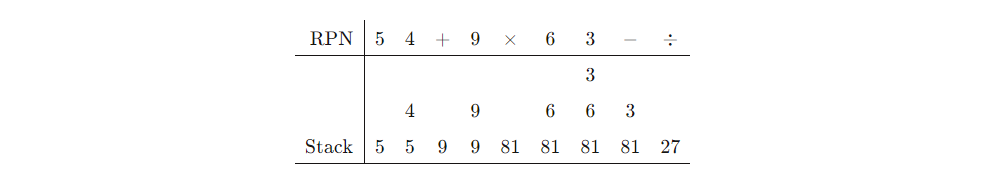

<h6>A visual example of the process of using a stack found via <a href="https://ianmcloughlin.github.io/reverse_polish_notation/">https://ianmcloughlin.github.io/reverse_polish_notation/</a> <a href="#ianRPN">[3]</a>, (2024)</h6>

## References

<a name="fp101"></a>[1] Williams, C. (2024) Functional Programming 101, Github. Available at: https://github.com/readme/guides/functional-programming-basics (Accessed: 14 February 2024).

<a name="medExpr"></a>[2] KODAD, Y. (2023) Understanding Expressions: Infix, Prefix, and Postfix Notations in Computer Science and Mathematics, Medium. Available at: https://medium.com/@serene_mulberry_tiger_125/understanding-expressions-infix-prefix-and-postfix-notations-in-computer-science-and-mathematics-c5390cee01be (Accessed: 23 February 2024).

<a name="ianRPN"></a>[3] McLoughlin, I. (2024) Reverse Polish Notation, ATU. Available at: https://ianmcloughlin.github.io/reverse_polish_notation/ (Accessed: 23 February 2024).

***
## End of Notebook